# Logistic Regression

It only predict only yes/no , True/False , 0/1

IT will be rain or not

It only operate on only on between and one

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline

In [2]:
titaic_data =  pd.read_csv(r"E:\ML\ML\ML Algorithm\titanic.csv")
titaic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [3]:
print("# Of passengers in original data :"+str(len(titaic_data.PassengerId)))
titaic_data.shape # or we can write this

# Of passengers in original data :891


(891, 12)

## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

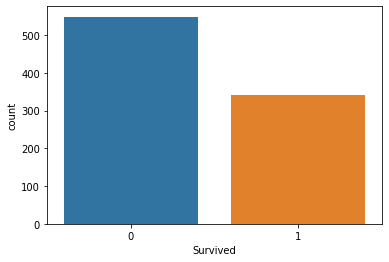

In [4]:
sns.countplot(x="Survived", data= titaic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

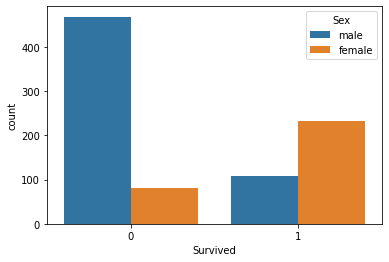

In [5]:
sns.countplot(x="Survived",hue="Sex",data=titaic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

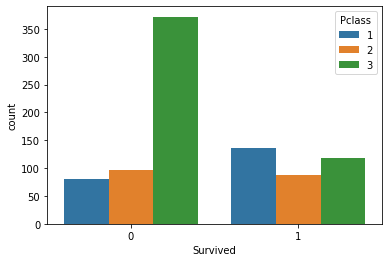

In [6]:
sns.countplot(x="Survived",hue="Pclass",data=titaic_data)

<AxesSubplot:ylabel='Frequency'>

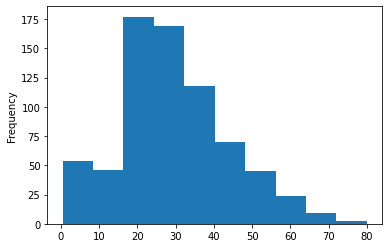

In [7]:
titaic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

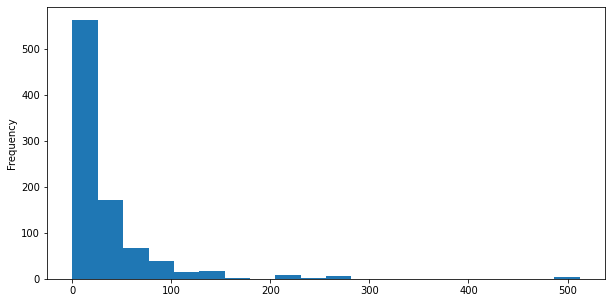

In [8]:
titaic_data["Fare"].plot.hist(bins=20,figsize=(10,5))

In [9]:
titaic_data.info() # to get the all information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

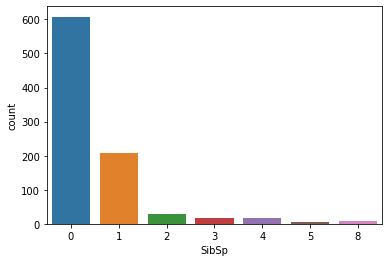

In [10]:
sns.countplot(x= "SibSp",data = titaic_data)

# Data Wragling (Cleaing Data)

In [11]:
titaic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titaic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

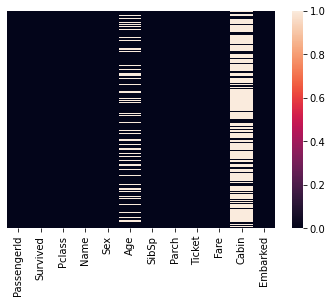

In [13]:
sns.heatmap(titaic_data.isnull(),yticklabels=False) # to see Null values in a Heatmap

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

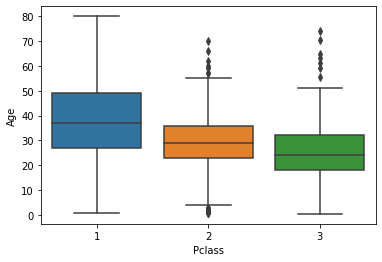

In [14]:
sns.boxplot(x = "Pclass" ,y = "Age", data= titaic_data)

In [15]:
titaic_data.head(6) # we can see y(survived/depended) it is in 0 and 1 format

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [16]:
titaic_data.drop("Cabin",axis = 1,inplace=True) # Delete data which is have more NULL values

In [17]:
titaic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
titaic_data.dropna(inplace=True)

<AxesSubplot:>

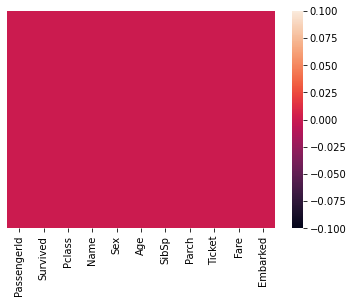

In [19]:
sns.heatmap(titaic_data.isnull(), yticklabels=False)

In [20]:
titaic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
sex = pd.get_dummies(titaic_data["Sex"],drop_first=1) # convert in to categrical varieable
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
embark = pd.get_dummies(titaic_data["Embarked"],drop_first= 1)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
Pcls  = pd.get_dummies(titaic_data["Pclass"],drop_first=1)
Pcls

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [24]:
titaic_data = pd.concat([titaic_data,sex,embark,Pcls],axis=1)
titaic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [25]:
titaic_data.drop(["Sex","Pclass","Name","PassengerId","Embarked","Ticket"],axis = 1 , inplace = True)

In [26]:
titaic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train Test Data

In [27]:
X = titaic_data.drop("Survived",axis=1)
y = titaic_data["Survived"]
X.shape
y.shape

(712,)

Importing Sklear

In [28]:
from sklearn.model_selection import train_test_split

Spliting the data 

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=21)

In [30]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(143,)

## Import LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train , y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
predictions = logmodel.predict(X_test)

## ACCURACY Check

In [35]:
from sklearn.metrics import classification_report

In [36]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.85        78\n           1       0.84      0.75      0.80        65\n\n    accuracy                           0.83       143\n   macro avg       0.83      0.82      0.82       143\nweighted avg       0.83      0.83      0.82       143\n'

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,predictions)

array([[69,  9],
       [16, 49]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,predictions)

0.8251748251748252